## Introduction

This tutorial will introduce you to new methods for dimensionality reduction, particularly focusing on Non Linear Dimensionality Reduction. Data forms a key aspect of data science. In many settings we want to visualize or analyze data in two or three dimensions, how do certain properties correlate with each other, and can we identify spatial patterns in data? Sometimes this also involves substantial analysis or machine learning, but sometimes just visuallizing data spatially tells us a great deal about some question we are interested in.

This tutorial tackles a classic application of the above technique using data of 1000 US stocks. We present a simple model to understand which stocks had similar price movements using dimensionality reduction. 

### Tutorial content

In this tutorial, we will perform dimensionality reduction on a set of 1000 stocks to find which stocks had similar price movements.

We'll be using data collected from Bloomberg for randomly chosen 1000 US stocks from time period 2017-08-18	 to 2017-09-29. This data is available publicly and can be downloaded from a variety of sources such as Yahoo Finance and Google Finance.

This tutorial uses Non Linear Dimensionality Reduction techniques namely ISOMAP and t-SNE to do the above. Note that PCA, a linear dimensionality reduction technique, wouldn't suffice for this problem. PCA works only when the data is distributed over a linear subspace. ISOMAP and t-SNE work for reducing the dimensionality of data over a non-linear manifold. These techniques represent a high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points.

We will cover the following topics in this tutorial:
- [Installing the libraries](#Installing-the-libraries)
- [Loading data and plotting](#Loading-data-and-plotting)
- [Dimensionality Reduction using ISOMAP](#Dimensionality-Reduction-using-ISOMAP)
- [Dimensionality Reduction using MDS](#Dimensionality-Reduction-using-MDS)
- [Dimensionality Reduction using t-SNE](#Dimensionality-Reduction-using-t-SNE)
- [Further Work](#Further-Work)
- [Summary and References](#Summary-and-References)

## Installing the libraries

Before getting started, you'll need to install the sklearn library that we will use. Within this, we use the ISOMAP and TSNE packages.

In [339]:
#Standard libraries
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white")
sns.set(rc={'figure.figsize':(11.7,8.27)})

from sklearn import preprocessing #For normalization
from sklearn.metrics import pairwise_distances
from sklearn.manifold import Isomap 
from sklearn.manifold import TSNE 

#### Running tutorial code

It is best practice to run the entire tutorial code together.

In an ipython notebook, this can be done using Menu -> Cell -> Run All

## About non-linear dimensionality reduction

An illustration of dimensionality reduction is shown on the S-curve dataset with various manifold learning methods. Manifold learning methods employ innovative techniques to reduce the dimensionality of data over a non-linear manifold.

In this tutorial, we explore two widely used techniques: ISOMAP and t-SNE.

The image below shows the working of various non-linear dimensionality reduction methods. The image on the graph on the left shows the true data distribution. The data is not distributed across a linear manifold. Hence, principal componenet analysis (PCA) would not be helpful in dimensionality reduction. The output of the data is two dimensions using various methods (including ISOMAP and t-SNE) is shown below.

<img src="dim.png">

## Loading data and plotting

Now that we've installed and loaded the libraries, let's load our stock price data.  This data is created by sampling 1000 stocks randomly using NYSE tickers. The data is contained in the file `stocksample.txt` (attached with the tutorial).

In [340]:
data = pd.read_table('stocksample.txt')
data.head()

,symb,name,sector,industry,2017-08-18,2017-08-21,2017-08-22,2017-08-23,2017-08-24,2017-08-25,...,2017-09-18,2017-09-19,2017-09-20,2017-09-21,2017-09-22,2017-09-25,2017-09-26,2017-09-27,2017-09-28,2017-09-29
0,NEWM,New Media Investment Group Inc.,Consumer Services,Newspapers/Magazines,13.500000,13.480000,13.730000,13.550000,13.630000,13.710000,...,13.830000,13.840000,14.020000,14.050000,14.210000,14.500000,14.610000,14.730000,14.820000,14.790000
1,DMO,Western Asset Mortgage Defined Opportunity Fun...,NaN,NaN,25.806456,25.874651,26.274071,25.866224,25.561569,25.630362,...,25.099674,25.080019,25.129154,25.173771,25.243176,25.183687,25.203516,25.084538,25.163857,25.352240
2,VMW,"Vmware, Inc.",Technology,Computer Software: Prepackaged Software,96.269997,97.010002,99.930000,100.389999,100.830002,102.739998,...,109.980003,109.680000,110.129997,109.070000,109.150002,107.519997,107.830002,109.209999,109.199997,109.190002
3,CCI,Crown Castle International Corporation,Consumer Services,Real Estate Investment Trusts,103.177513,103.881088,104.782845,105.139587,105.773796,106.021530,...,104.489998,102.160004,101.839996,101.599998,100.599998,100.129997,99.570000,99.989998,100.540001,99.980003
4,MNK,Mallinckrodt plc,Health Care,Major Pharmaceuticals,36.389999,36.130001,37.119999,37.209999,38.250000,39.009998,...,33.759998,34.070000,34.490002,34.860001,34.830002,35.250000,34.669998,35.389999,36.139999,37.369999


The above data frame has a 1000 rows and 34 columns. The first 4 columns include the ticker's symbol, name, sector and industry. The remaining 30 columns have the 30 day price time series data.

#### Plotting time series of a couple of stocks

In [341]:
#Row->Stock no. and columns 4-34 contain it's 30-day time series
stock1 = data.iloc[3,4:34] 
stock2 = data.iloc[4,4:34]

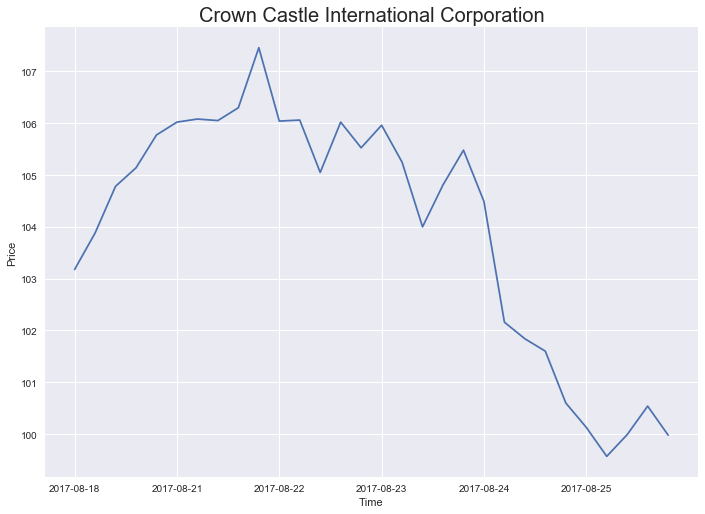

In [342]:
plt.plot(stock1);
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(data.iloc[3,1],fontsize=20); #Column 1 contains the stock's name
plt.xticks(np.arange(0, 30, step=5));

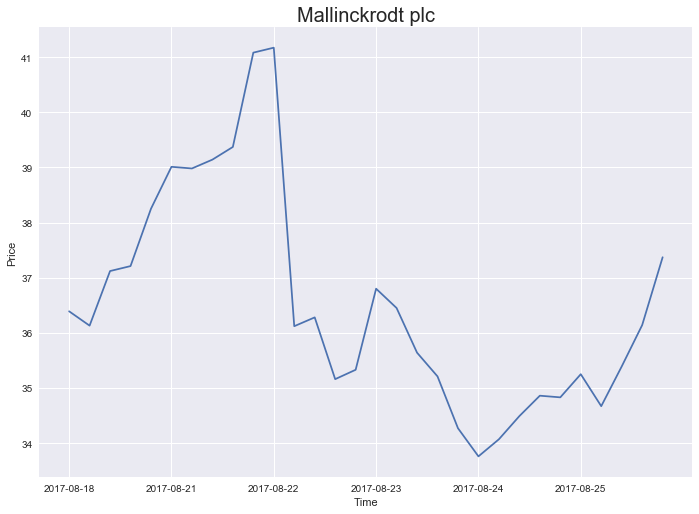

In [343]:
plt.plot(stock2);
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(data.iloc[4,1],fontsize=20); #Column 1 contains the stock's name
plt.xticks(np.arange(0, 30, step=5));

#### Data used as input:

In [344]:
#We isolate columns 4-34 corresponding to the 30-day time series
X = data.iloc[:,4:34]
X.head()

,2017-08-18,2017-08-21,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-28,2017-08-29,2017-08-30,2017-08-31,...,2017-09-18,2017-09-19,2017-09-20,2017-09-21,2017-09-22,2017-09-25,2017-09-26,2017-09-27,2017-09-28,2017-09-29
0,13.500000,13.480000,13.730000,13.550000,13.630000,13.710000,13.770000,13.680000,13.790000,13.790000,...,13.830000,13.840000,14.020000,14.050000,14.210000,14.500000,14.610000,14.730000,14.820000,14.790000
1,25.806456,25.874651,26.274071,25.866224,25.561569,25.630362,25.600880,25.767948,25.836744,25.807261,...,25.099674,25.080019,25.129154,25.173771,25.243176,25.183687,25.203516,25.084538,25.163857,25.352240
2,96.269997,97.010002,99.930000,100.389999,100.830002,102.739998,104.680000,104.930000,106.959999,108.099998,...,109.980003,109.680000,110.129997,109.070000,109.150002,107.519997,107.830002,109.209999,109.199997,109.190002
3,103.177513,103.881088,104.782845,105.139587,105.773796,106.021530,106.080994,106.051262,106.298996,107.458412,...,104.489998,102.160004,101.839996,101.599998,100.599998,100.129997,99.570000,99.989998,100.540001,99.980003
4,36.389999,36.130001,37.119999,37.209999,38.250000,39.009998,38.980000,39.139999,39.369999,41.080002,...,33.759998,34.070000,34.490002,34.860001,34.830002,35.250000,34.669998,35.389999,36.139999,37.369999


Note that each row represents one observation i.e. each row represents to a 30-dimensional point and there are 1000 such points (or observations.)

#### Normalization:


Since all the methods described use Euclidean distances, it's important to normalize each time series. Normalization is done by subtracting the mean of each row and then dividing by the standard deviation. 

We do this on our data set contained in the data frame X.

In [345]:
#Normalizing
X = X.values #returns a numpy array
X = preprocessing.scale(X)
X = pd.DataFrame(X)

## Dimensionality Reduction using ISOMAP

#### Introduction
Isomap is an approach to non-linear dimension reduction built on MDS with a well-chosen geodesic distance between points. In the mathematical field of graph theory, the distance between two vertices in a graph is the number of edges in a shortest path (also called a graph geodesic) connecting them. This is also known as the geodesic distance. 

This algorithm employs the following steps:
1. Connect all "neighbouring" observations: This can be achieved by finding all observations within distance $epsilon$ or by finding the $K$ nearest neighbours of each observation. The latter is used in Python and is represented by the parameter `n_neighbours`.
2. Assign weights to connected observations: The allocated weight equal to the Euclidean distance between the observations.
3. Calculate the geodesic distance between all pairs of points: This is the shortest path between points using the provided weights. (This gives us a distance matrix).
4. Use MDS on the resulting distance matrix (explained below).

#### A sidenote on MDS (Multi-Dimensional Scaling)

MDS aims at reducing high dimensional data with the most raw methodology i.e. by finding coordinates of the high dimensional data in a lower dimensional space by minimizing the sum of distances between the points in this space.

The criterion minimized by MDS is:
$$Stress(x_1, x_2,..., x_n) = (\sum_{i \neq j} (d_{i,j} - \delta(x_i, x_j))^{2})^{1/2}$$ 

where $d_{ij}$  is the "true" distance between observations $i$ and $j$, and $\delta(x_i, x_j)$ is the distance in the lower-dimensional mapping.

The above is based on the assumption that points that are farther apart (as per the given distance metric) are more "dissimilar" than the ones that are closer. The typical distance metric used is Euclidean distance.

#### Visualizing distances

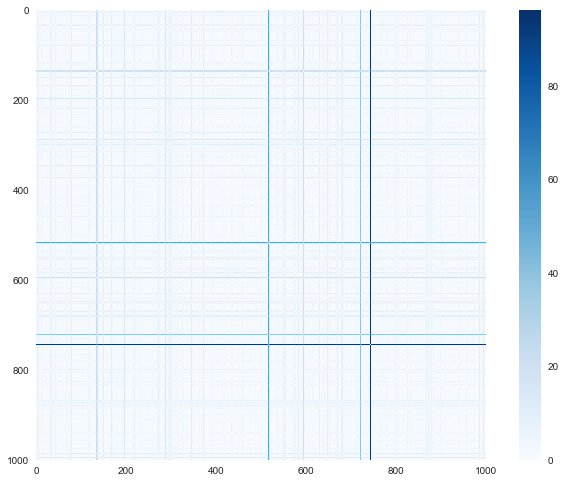

In [346]:
D = pairwise_distances(X)
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

#### Applying ISOMAP:

In [375]:
n_neighbors = 5 #The no. of neighbours to be considered for getting the lowest Euclidean distance
n_components = 2 #The no. of dimensions to reduce down the data to
isoout = Isomap(n_neighbors, n_components).fit_transform(X)

#Appending the reduced dimensions to the original data set
if 'tSNE_Dimension1' in data:
    data['tSNE_Dimension1'] = tnseout[:,0]
    data['tSNE_Dimension2'] = tnseout[:,1]
else:
    data = pd.concat([data.reset_index(drop=True), pd.DataFrame(isoout, columns=['ISOMAPDimension1','ISOMAPDimension2'])], axis=1)

In [376]:
uniqueSectors = list(set(np.array(data.sector)))
uniqueSectorsDict = {uniqueSectors[i]:i for i in range(len(uniqueSectors))}
data['sectorCode'] = [uniqueSectorsDict[i] for i in data['sector']]

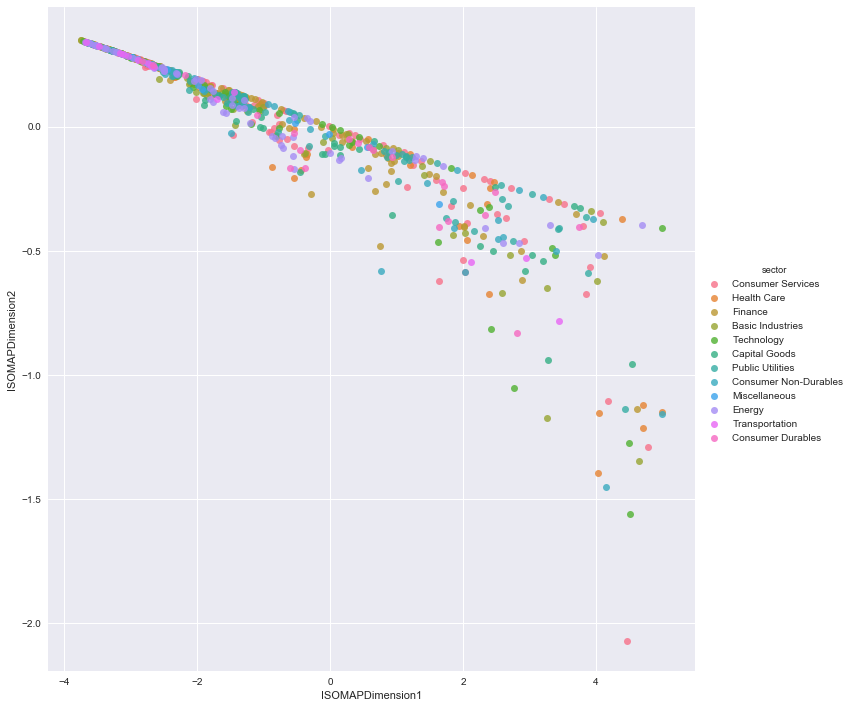

In [377]:
#Plotting truncated data to prevent outliers from distorting the graph
data_isoomap = data.copy() 
data_isoomap = data_isoomap[(abs(data_isoomap['ISOMAPDimension1']) < 5) & (abs(data_isoomap['ISOMAPDimension2']) < 5)]
sns.lmplot(x="ISOMAPDimension1",y="ISOMAPDimension2",data=data_isoomap,fit_reg=False,hue='sector',size=10);

The above plot shows the location of each stock in the two dimensional plane. Two points closest to each other imply two stocks with the most similar time series. We make an attempt to find any clusters by coloring the stocks by their sector. However, this doesn't in anything specific.

In order to see how the algorithm has performed, we pick two points (stocks) that are separated by the smallest distance and plot their 30-day time series. These should be quite similar to each other.

#### Finding nearest points

In [350]:
def nearestPoints(out,farthestInstead=False):
    """
    Input: A 2D array containing the x and y coordinates of all the points on the graph
    Output: The coordinates and distances of the closest and second closest points
    If farthestInstead is True, then it returns the coordinates and distances of the
    farthest points.
    """
    #Converting 2d array to data frame
    dist = pd.DataFrame(out, columns=['x','y'])
    
    #All distances are less than 1
    minDist_1, minDist2 = 1000,1000 #These store the smallest and second smallest distance
    imin_1, jmin_1 = 0,0 #(i,j) for the closest points
    imin_2, jmin_2 = 0,0 #(i,j) for the second closest points
    
    #For farthest points
    maxDist_1, maxDist2 = -1,-1 #These store the farthest and second farthest distance
    imax_1, jmax_1 = 0,0 #(i,j) for the closest points
    imax_2, jmax_2 = 0,0 #(i,j) for the second closest points
    
    nrows = dist.shape[0]

    for i in range(nrows):
        for j in range(i+1,nrows,1):
            x1 = dist.iloc[i,0]
            y1 = dist.iloc[i,1]
            x2 = dist.iloc[j,0]
            y2 = dist.iloc[j,0]
            d = ((x1-x2)**2 + (y1-y2)**2)**0.5
            if farthestInstead == False:
                if minDist_1 > d:
                    minDist_2 = minDist_1
                    imin_2 = imin_1
                    jmin_2 = jmin_1
                    minDist_1 = d
                    imin_1 = i
                    jmin_1 = j
            else:
                if maxDist_1 < d:
                    maxDist_2 = maxDist_1
                    imax_2 = imax_1
                    jmax_2 = jmax_1
                    maxDist_1 = d
                    imax_1 = i
                    jmax_1 = j
    
    if farthestInstead == False:
        return (imin_1,jmin_1,minDist_1,imin_2,jmin_2,minDist_2)
    else:
        return (imax_1,jmax_1,maxDist_1,imax_2,jmax_2,maxDist_2)

In [351]:
imin_1,jmin_1,minDist_1,imin_2,jmin_2,minDist_2 = nearestPoints(isoout)

In [352]:
print('Minimum distance is', minDist_1, 'corresponding to rows', imin_1, 'and', jmin_1)

Minimum distance is 0.007780831153859362 corresponding to rows 14 and 897


Plotting the times series of the closest stocks obtained:

In [353]:
def plotStockPair(i,j,distance,data,method=None,typeDist="closest"):
    """
    Input: 
        i: Row index of stock 1 to plot
        j: Row index of stock 2 to plot
        distance: Distance between the stock pair
        data: A data frame containing the entire stock data. Note that 
        this data frame should be identical structurally to the one 
        defined in the beginning of the tutorial.
        method: A string to display on the graph
        typeDist: Whether we're plotting closest or farthest stocks (used in the plot title)
    """

    stock1 = data.iloc[i,4:34] 
    stock2 = data.iloc[j,4:34]

    fig,ax = plt.subplots(1,2)
    ax[0].plot(stock1);
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Price')
    ax[0].set_title(data.iloc[i,1]);
    ax[0].set_xticks(np.arange(0, 30, step=7))
    ax[1].plot(stock2);
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Price')
    ax[1].set_title(data.iloc[j,1]);
    ax[1].set_xticks(np.arange(0, 30, step=7))
    if method != None:
        if typeDist == "closest":
            fig.suptitle('Closest stocks in 2D reduced space with distance = '+str(round(distance,8))+' using '+method,fontsize=20);
        else:
            fig.suptitle('Farthest stocks in 2D reduced space with distance = '+str(round(distance,8))+' using '+method,fontsize=20);

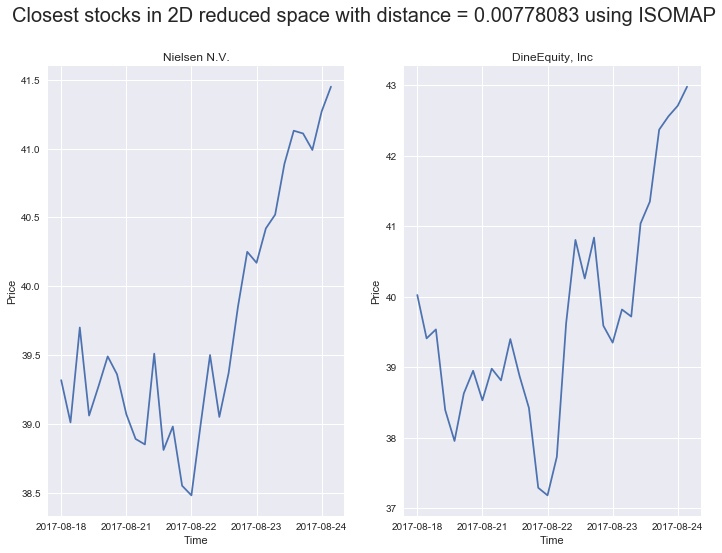

In [354]:
plotStockPair(imin_1,jmin_1,minDist_1,data,'ISOMAP')

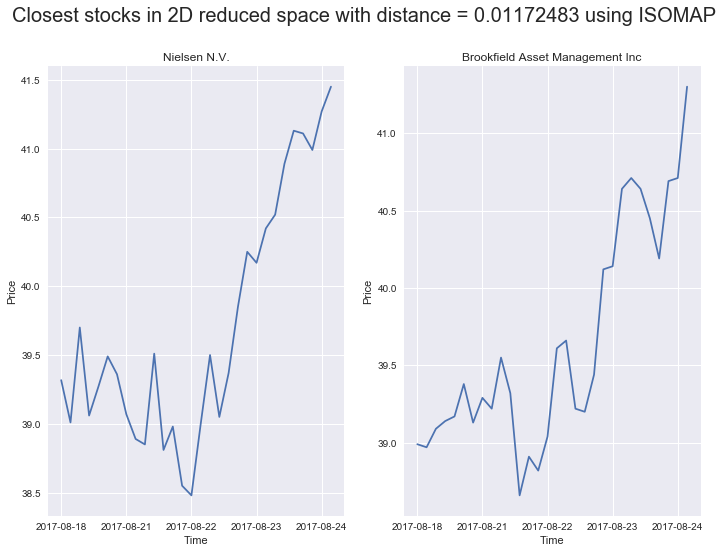

In [355]:
plotStockPair(imin_2,jmin_2,minDist_2,data,'ISOMAP')

#### Comparison with farthest points

The above can be contrasted by plotting a 2 stocks which are the most dissimilar (with the most different time series):

In [356]:
imax_1,jmax_1,maxDist_1,imax_2,jmax_2,maxDist_2 = nearestPoints(isoout,farthestInstead=True)

In [357]:
print('Maximum distance is', maxDist_1, 'corresponding to rows', imax_1, 'and', jmax_1)

Maximum distance is 137.48866037240708 corresponding to rows 321 and 743


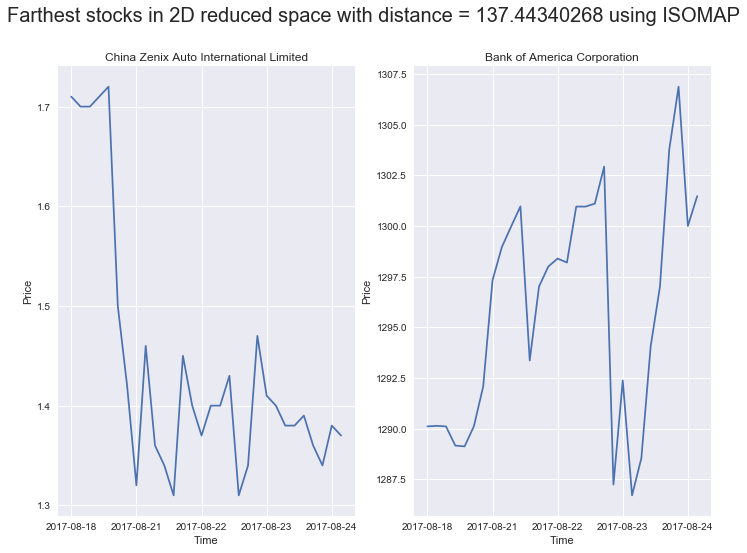

In [358]:
plotStockPair(imax_2,jmax_2,maxDist_2,data,'ISOMAP',typeDist="farthest")

As per expectations, these time series are moving in just the opposite direction.

## Dimensionality Reduction using t-SNE


#### Introduction
The t-SNE algorithm comprises two main stages: 

First, t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that similar objects have a high probability of being picked, whilst dissimilar points have an extremely small probability of being picked. 

Second, t-SNE defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the Kullback–Leibler divergence between the two distributions with respect to the locations of the points in the map.

The distance measure used at every stage (and in this tutorial) is Euclidean distance. This can be changed as per one's requirement.

#### Applying t-SNE:

In [369]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnseout = tsne.fit_transform(X)
tnseout

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.056249
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.361500
[t-SNE] Error after 300 iterations: 0.277204


array([[  6.637386  ,   0.61413264],
       [  7.0322433 , -15.666246  ],
       [-13.370553  ,  10.697609  ],
       ...,
       [ 16.682884  ,  -1.0222392 ],
       [ 12.19203   ,   1.2195498 ],
       [ -9.542377  ,  -3.646376  ]], dtype=float32)

In [371]:
#Appending the reduced dimensions to the original data set
if 'tSNE_Dimension1' in data:
    data['tSNE_Dimension1'] = tnseout[:,0]
    data['tSNE_Dimension2'] = tnseout[:,1]
else:
    data = pd.concat([data.reset_index(drop=True), pd.DataFrame(data = {'tSNE_Dimension1':tnseout[:,0], 'tSNE_Dimension2':tnseout[:,1]})], axis=1)

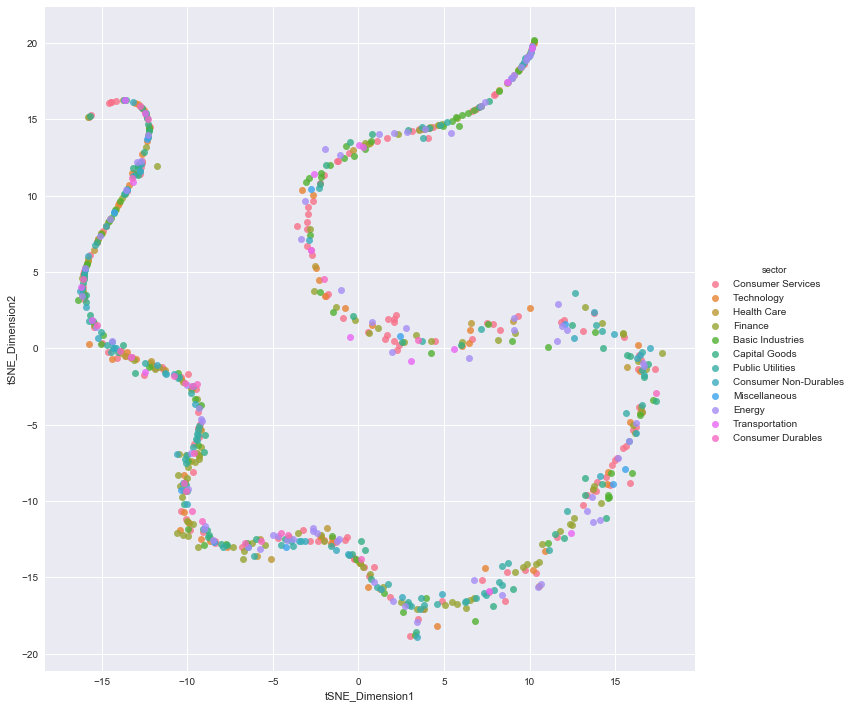

In [372]:
sns.lmplot(x="tSNE_Dimension1",y="tSNE_Dimension2",data=data,fit_reg=False,hue='sector',size=10);

#### Finding nearest points

In [374]:
imin_1,jmin_1,minDist_1,imin_2,jmin_2,minDist_2 = nearestPoints(tnseout)

In [378]:
print('Minimum distance is', minDist_1, 'corresponding to rows', imin_1, 'and', jmin_1)

Minimum distance is 0.010309127609592763 corresponding to rows 259 and 487


Plotting the times series of the closest stocks obtained:

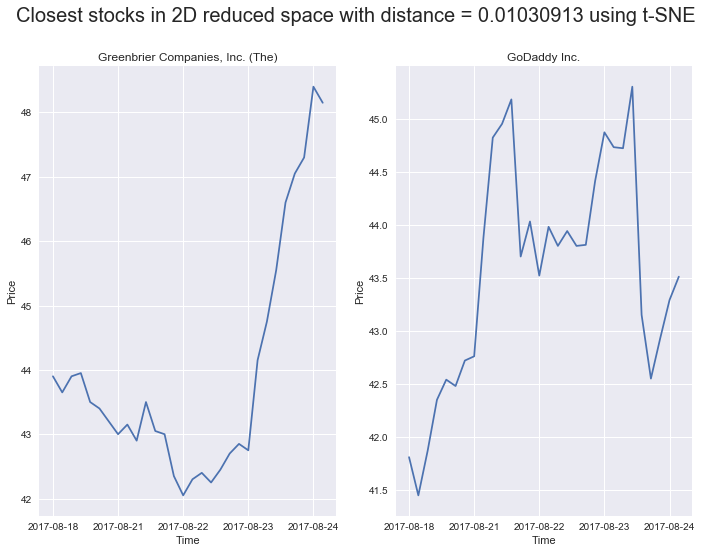

In [379]:
plotStockPair(imin_1,jmin_1,minDist_1,data,'t-SNE')

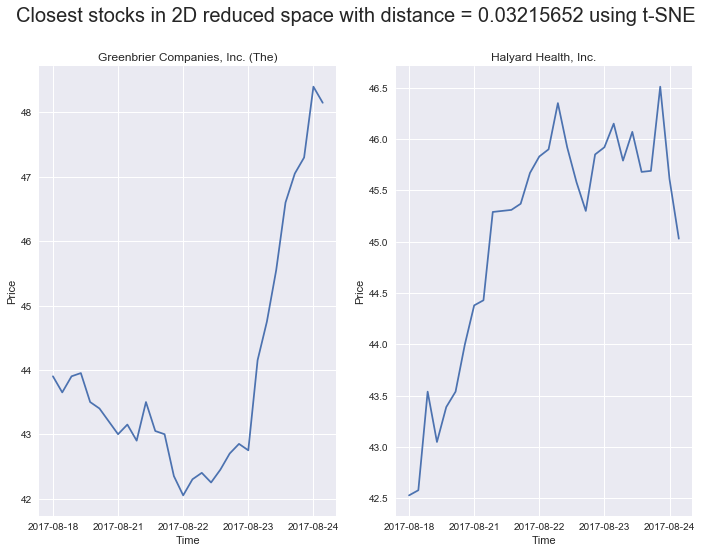

In [380]:
plotStockPair(imin_2,jmin_2,minDist_2,data,'t-SNE')

#### Comparison with farthest points

The above can be contrasted by plotting a 2 stocks which are the most dissimilar (with the most different time series):

In [381]:
imax_1,jmax_1,maxDist_1,imax_2,jmax_2,maxDist_2 = nearestPoints(isoout,farthestInstead=True)

In [382]:
print('Maximum distance is', maxDist_1, 'corresponding to rows', imax_1, 'and', jmax_1)

Maximum distance is 137.48866037240705 corresponding to rows 321 and 743


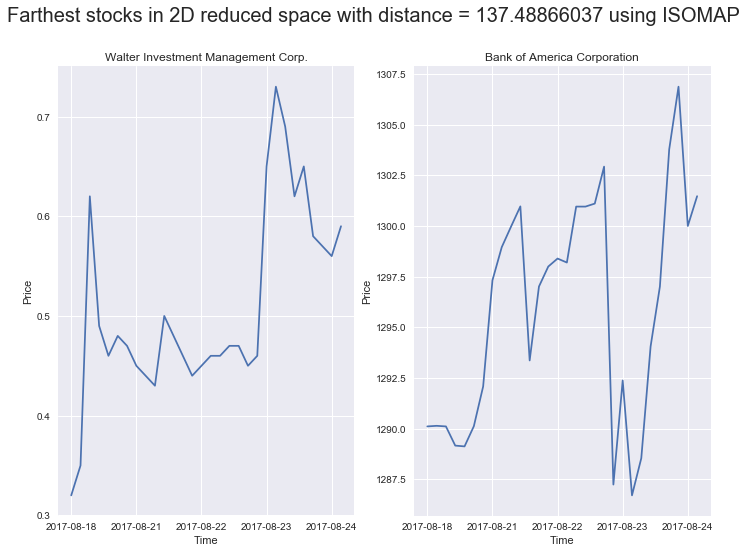

In [383]:
plotStockPair(imax_1,jmax_1,maxDist_1,data,'ISOMAP',typeDist="farthest")

As per expectations, the above series are opposite. Note the drop in the second stock (near 2017-08-23) precisely when there is an upward spike in the first one. 

## Conclusion

As visible in the results above, both ISOMAP and t-SNE perform well. t-SNE is more robust to noise in the data as it utilizes a probabilistic random walk based algorithm to solve the problem.

## Further work

#### 1. Factor Selection

The 2-dimensional plots obtained above have been used only to get the closest stocks. Coloring the plots on the basis of sector does not yield any clear pattern. 

However, a variety of other factors can be explored. These include:
* Market cap
* P/E ratio
* Sub-industry
* Location

#### 2. Clustering

Using a clustering algorithm on the stocks obtained in 2 dimensions, we can isolate groups of stocks and then explore any common properties that they might (or might not) be having. Further, given a new stock, it's appropriate cluster can be identified on the basis of these properties.

This can be widely used to create portfolios of stocks as per client requirements and can also for hedging purposes in finance.

## Summary and references

This tutorial highlighted just a few elements of what is possible with data analyzed for geospatial data in Python.  Much more detail about the libraries and questions on GIS is general are available from the following links.

1. ISOMAP: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html
2. Visualizing Data using t-SNE: http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf
2. Manifold Learning: https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html
3. Visualizing high dimensional data sets: https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b